In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_csv("survey(cleaned).csv")

In [3]:
df.head(2)

,id,종류,몇마리,반려동물나이,품종,지출빈도(회),지출금액(만원),구입경로,빈용몰_쿠팡,빈용몰_대형마트,빈용몰_펫프렌즈,빈용몰_스마트스토어,빈용몰_기타,확인요소_가격,확인요소_성분질,확인요소_다양성,확인요소_원산지,확인요소_신선도,최다지출_간식,최다지출_사료,최다지출_영양제,목적_건강관리,목적_노화방지,목적_맛난거먹일마음,목적_내심리적안정,최근만족도,구매성향,새식품만족도,구매기준_나이,구매기준_소화율,구매기준_영양성분,구매기준_다이어트,구매기준_질환여부,구매기준_신체조건,선호제품유형,설문자성별,설문자나이,경제활동 여부,혼자사는지,연락처
0,2020-02-22 18:48:14.038,반려묘,1.0,2~5세,코숏,2.5,2.5,캣페어 와 온라인 쇼핑,1.0,1.0,1.0,1.0,5.0,3,5,1,2,4,1,3,2,4,3,2,1,"불만족, 성분 이슈가 많아서. 복잡해지기만 함",기존 제품 재구매,4,2,3,5,1,6,4,유기농 제품,여,30~34세,네,아니오,01030343313
1,2020-02-22 19:10:57.177,반려견,1.0,6~8세,토이푸들,2.5,12.5,반려동물 전문매장,4.0,5.0,2.0,3.0,NaN,2,5,4,3,5,3,2,1,4,1,3,2,만족,기존 제품 재구매,5,5,6,6,5,6,6,유기농 제품,남,25~29세,아니오,아니오,010


In [3]:
df['총지출액'] = df['지출빈도(회)'] * df['지출금액(만원)']

# 클러스터링 할 만한 features
- 구매 시 확인요소: 가격, 성분질, 다양성, 원산지, 신선도
- 구매목적: 건강관리, 노화방지, 맛난거먹일마음, 내심리적안정
- 구매기준: 나이, 소화율, 영양성분, 다이어트, 질환여부, 신체조건

# Clustering

## Feature: 확인요소

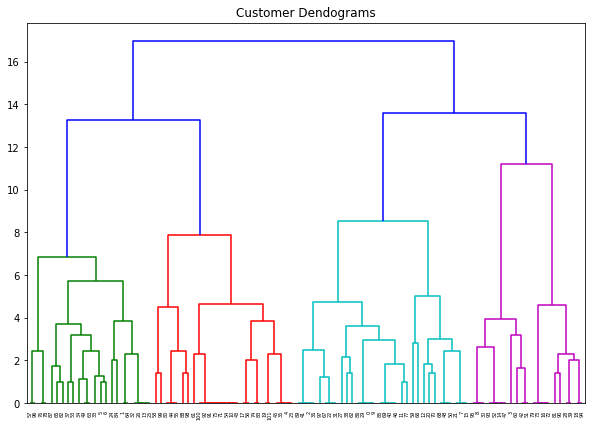

In [29]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
data = df[['확인요소_가격','확인요소_성분질', '확인요소_다양성',
           '확인요소_원산지', '확인요소_신선도']].values

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))
plt.show()

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42).fit(data)

df['kmeans_5_확인요소'] = kmeans.labels_

In [31]:
df['kmeans_5_확인요소'].value_counts()

2    33
1    23
3    19
4    15
0    12
Name: kmeans_5_확인요소, dtype: int64

In [33]:
df.groupby('kmeans_5_확인요소')[['확인요소_가격','확인요소_성분질', '확인요소_다양성',
           '확인요소_원산지', '확인요소_신선도']].mean()

,확인요소_가격,확인요소_성분질,확인요소_다양성,확인요소_원산지,확인요소_신선도
kmeans_5_확인요소,,,,,
0,4.250000,4.333333,3.333333,1.583333,1.500000
1,2.173913,4.782609,1.304348,3.913043,3.173913
2,3.969697,4.393939,1.636364,1.606061,3.575758
3,1.526316,5.000000,3.368421,2.526316,3.526316
4,3.866667,5.000000,3.466667,4.066667,4.533333


In [46]:
df.groupby('kmeans_5_목적')[['확인요소_가격','확인요소_성분질', '확인요소_다양성',
           '확인요소_원산지', '확인요소_신선도']].mean()

,확인요소_가격,확인요소_성분질,확인요소_다양성,확인요소_원산지,확인요소_신선도
kmeans_5_목적,,,,,
0,3.290323,4.612903,2.290323,2.645161,3.000000
1,3.800000,4.900000,3.100000,3.600000,4.400000
2,3.027778,4.666667,2.222222,2.388889,3.222222
3,3.230769,4.538462,2.153846,2.846154,3.538462
4,2.333333,4.833333,2.500000,2.500000,3.750000


## Feature: 목적

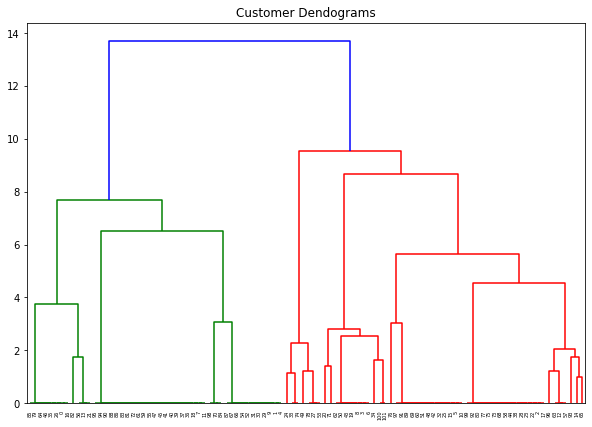

In [35]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
data = df[['목적_건강관리', '목적_노화방지', '목적_맛난거먹일마음', '목적_내심리적안정']].values

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))
plt.show()

In [36]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(data)

df['kmeans_5_목적'] = kmeans.labels_

In [38]:
df['kmeans_5_목적'].value_counts()

2    36
0    31
3    13
4    12
1    10
Name: kmeans_5_목적, dtype: int64

In [44]:
df.groupby('kmeans_5_목적')[['목적_건강관리', '목적_노화방지', '목적_맛난거먹일마음', '목적_내심리적안정']].mean()

,목적_건강관리,목적_노화방지,목적_맛난거먹일마음,목적_내심리적안정
kmeans_5_목적,,,,
0,2.967742,1.516129,4.000000,1.548387
1,3.900000,3.000000,4.000000,3.500000
2,4.000000,1.611111,2.916667,1.500000
3,2.000000,1.230769,3.769231,3.307692
4,4.000000,2.916667,1.666667,1.416667


In [47]:
df.groupby('kmeans_5_목적')[['확인요소_가격','확인요소_성분질', '확인요소_다양성',
           '확인요소_원산지', '확인요소_신선도']].mean()

,확인요소_가격,확인요소_성분질,확인요소_다양성,확인요소_원산지,확인요소_신선도
kmeans_5_목적,,,,,
0,3.290323,4.612903,2.290323,2.645161,3.000000
1,3.800000,4.900000,3.100000,3.600000,4.400000
2,3.027778,4.666667,2.222222,2.388889,3.222222
3,3.230769,4.538462,2.153846,2.846154,3.538462
4,2.333333,4.833333,2.500000,2.500000,3.750000


In [48]:
df.groupby('kmeans_5_목적')[['총지출액']].mean()

,총지출액
kmeans_5_목적,
0,22.072581
1,15.325000
2,25.173611
3,36.326923
4,35.937500


## Feature: 구매기준

In [40]:
df.columns

Index(['id', '종류', '몇마리', '반려동물나이', '품종', '지출빈도(회)', '지출금액(만원)', '구입경로',
       '빈용몰_쿠팡', '빈용몰_대형마트', '빈용몰_펫프렌즈', '빈용몰_스마트스토어', '빈용몰_기타', '확인요소_가격',
       '확인요소_성분질', '확인요소_다양성', '확인요소_원산지', '확인요소_신선도', '최다지출_간식', '최다지출_사료',
       '최다지출_영양제', '목적_건강관리', '목적_노화방지', '목적_맛난거먹일마음', '목적_내심리적안정', '최근만족도',
       '구매성향', '새식품만족도', '구매기준_나이', '구매기준_소화율', '구매기준_영양성분', '구매기준_다이어트',
       '구매기준_질환여부', '구매기준_신체조건', '선호제품유형', '설문자성별', '설문자나이', '경제활동 여부',
       '혼자사는지', '연락처', '총지출액', 'kmeans_5_확인요소', 'kmeans_5_목적'],
      dtype='object')

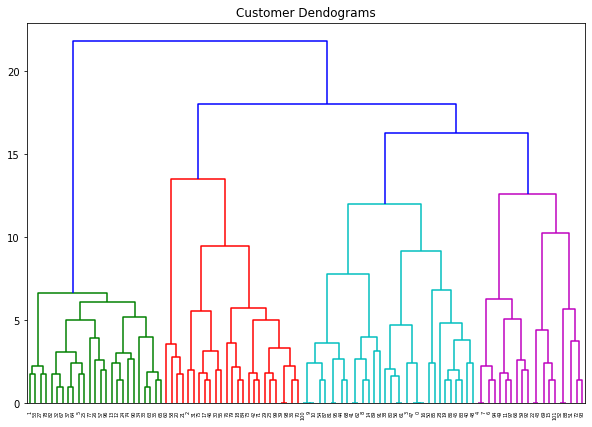

In [41]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
data = df[['구매기준_나이', '구매기준_소화율', '구매기준_영양성분', '구매기준_다이어트',
       '구매기준_질환여부', '구매기준_신체조건']].values

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))
plt.show()

In [42]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, random_state=0).fit(data)

df['kmeans_7_구매기준'] = kmeans.labels_

In [43]:
df['kmeans_7_구매기준'].value_counts()

3    23
0    20
2    16
1    14
4    13
5     9
6     7
Name: kmeans_7_구매기준, dtype: int64

In [45]:
df.groupby('kmeans_7_구매기준')[['구매기준_나이', '구매기준_소화율', '구매기준_영양성분', '구매기준_다이어트',
       '구매기준_질환여부', '구매기준_신체조건']].mean()

,구매기준_나이,구매기준_소화율,구매기준_영양성분,구매기준_다이어트,구매기준_질환여부,구매기준_신체조건
kmeans_7_구매기준,,,,,,
0,2.700000,4.250000,5.350000,1.500000,5.100000,2.100000
1,3.142857,4.857143,5.285714,1.428571,2.071429,4.500000
2,5.375000,4.000000,5.375000,1.562500,2.750000,2.125000
3,5.173913,5.347826,5.739130,3.565217,5.086957,4.956522
4,2.076923,3.153846,4.384615,1.615385,5.000000,5.076923
5,1.666667,3.666667,5.333333,5.000000,2.444444,2.888889
6,5.428571,3.285714,3.000000,4.285714,5.142857,2.285714


# '확인목적'에 초점

In [8]:
df = pd.read_csv("survey(cleaned).csv")

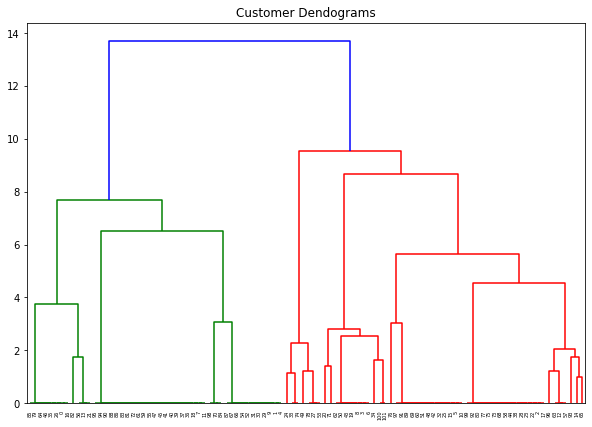

In [51]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
data = df[['목적_건강관리', '목적_노화방지', '목적_맛난거먹일마음', '목적_내심리적안정']].values

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))
plt.show()

In [56]:
from sklearn.cluster import KMeans

data = df[['목적_건강관리', '목적_노화방지', '목적_맛난거먹일마음', '목적_내심리적안정']].values
pre_inertia = 0
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(data)
    print("{}개 클러스터의 inertia는 {}, 차이는 {}".format(i, kmeans.inertia_, pre_inertia-kmeans.inertia_))
    pre_inertia = kmeans.inertia_

1개 클러스터의 inertia는 290.17647058823525, 차이는 -290.17647058823525
2개 클러스터의 inertia는 194.47453703703704, 차이는 95.70193355119821
3개 클러스터의 inertia는 146.04923445535297, 차이는 48.425302581684065
4개 클러스터의 inertia는 107.44254549214227, 차이는 38.6066889632107
5개 클러스터의 inertia는 77.17171215880893, 차이는 30.270833333333343
6개 클러스터의 inertia는 57.34054332764009, 차이는 19.83116883116884
7개 클러스터의 inertia는 43.809270269372576, 차이는 13.531273058267516
8개 클러스터의 inertia는 35.93549783549783, 차이는 7.873772433874748
9개 클러스터의 inertia는 28.811688311688314, 차이는 7.123809523809513
10개 클러스터의 inertia는 23.775324675324676, 차이는 5.036363636363639
11개 클러스터의 inertia는 19.411688311688312, 차이는 4.363636363636363
12개 클러스터의 inertia는 14.984920634920636, 차이는 4.4267676767676765
13개 클러스터의 inertia는 12.43946608946609, 차이는 2.5454545454545467
14개 클러스터의 inertia는 10.040476190476191, 차이는 2.398989898989898


In [9]:
data = df[['목적_건강관리', '목적_노화방지', '목적_맛난거먹일마음', '목적_내심리적안정']].values

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=42).fit(data)

df['kmeans_6_목적'] = kmeans.labels_

In [10]:
df

,id,종류,몇마리,반려동물나이,품종,지출빈도(회),지출금액(만원),구입경로,빈용몰_쿠팡,빈용몰_대형마트,빈용몰_펫프렌즈,빈용몰_스마트스토어,빈용몰_기타,확인요소_가격,확인요소_성분질,확인요소_다양성,확인요소_원산지,확인요소_신선도,최다지출_간식,최다지출_사료,최다지출_영양제,목적_건강관리,목적_노화방지,목적_맛난거먹일마음,목적_내심리적안정,최근만족도,구매성향,새식품만족도,구매기준_나이,구매기준_소화율,구매기준_영양성분,구매기준_다이어트,구매기준_질환여부,구매기준_신체조건,선호제품유형,설문자성별,설문자나이,경제활동 여부,혼자사는지,연락처,kmeans_6_목적
0,2020-02-22 18:48:14.038,반려묘,1.0,2~5세,코숏,2.5,2.5,캣페어 와 온라인 쇼핑,1.0,1.0,1.0,1.0,5.0,3,5,1,2,4,1,3,2,4,3,2,1,"불만족, 성분 이슈가 많아서. 복잡해지기만 함",기존 제품 재구매,4,2,3,5,1,6,4,유기농 제품,여,30~34세,네,아니오,01030343313,3
1,2020-02-22 19:10:57.177,반려견,1.0,6~8세,토이푸들,2.5,12.5,반려동물 전문매장,4.0,5.0,2.0,3.0,NaN,2,5,4,3,5,3,2,1,4,1,3,2,만족,기존 제품 재구매,5,5,6,6,5,6,6,유기농 제품,남,25~29세,아니오,아니오,010,5
2,2020-02-22 19:19:54.158,반려묘,1.0,2세 미만,러시안블루 고양이,2.5,7.5,반려동물 전문매장,4.0,5.0,3.0,1.0,2.0,4,5,2,1,3,3,2,1,3,1,4,2,만족,기존 제품 재구매,4,6,1,5,2,3,4,천연 제품,남,20~24세,네,아니오,01082450271,0
3,2020-02-22 19:24:03.594,반려견,1.0,6~8세,도베르만,4.5,12.5,반려동물 전문매장,2.0,5.0,4.0,3.0,1.0,3,4,5,2,1,1,2,3,2,1,4,3,만족,기존 제품 재구매,4,3,2,6,1,5,4,유기농 제품,남,30~34세,네,아니오,us.cosmos0816@gmail.com,4
4,2020-02-22 19:24:07.362,반려묘,1.0,2세 미만,코숏,2.5,7.5,온라인 쇼핑몰,4.0,5.0,1.0,2.0,3.0,2,5,1,3,4,1,3,2,4,1,3,2,만족,기존 제품 재구매,2,3,4,6,1,2,5,신선한 식품,여,25~29세,네,아니오,01089795432,5
5,2020-02-22 19:34:01.426,반려견,1.0,12세 이상,슈나우저,2.5,12.5,온라인 쇼핑몰,3.0,5.0,1.0,2.0,4.0,4,5,3,4,4,2,3,1,3,2,4,1,만족,기존 제품 재구매,4,5,4,6,3,5,4,신선한 식품,남,40세 이상,네,아니오,010-9100-3123,0
6,2020-02-22 19:41:03.154,반려견 🐶,1.0,12세 이상,믹스(진돗개+허스키),2.5,7.5,온라인 쇼핑몰,2.0,3.0,4.0,5.0,5.0,4,5,3,4,5,2,3,1,2,1,4,3,만족,기존 제품 재구매,3,3,4,6,2,1,5,신선한 식품,여,30~34세,네,아니오,01098009389,4
7,2020-02-22 19:45:08.725,반려묘,1.0,2~5세,숏헤어,2.5,7.5,반려동물 전문매장,3.0,5.0,2.0,4.0,1.0,5,3,2,1,4,2,3,1,4,2,3,1,만족,기존 제품 재구매,3,3,4,6,1,2,5,신선한 식품,남,25~29세,아니오,아니오,010-9462-5538,1
8,2020-02-22 19:45:35.336,반려견,1.0,2세 미만,토이푸들,2.5,7.5,반려동물 전문매장,1.0,1.0,1.0,1.0,1.0,4,5,3,2,1,3,2,1,2,1,4,3,만족,기존 제품 재구매,3,2,5,6,4,3,1,일반 가공 식품,여,40세 이상,네,아니오,NaN,4
9,2020-02-22 19:50:12.575,반려묘,1.0,2세 미만,러시안 블루,1.0,7.5,온라인 쇼핑몰,4.0,5.0,2.0,3.0,1.0,3,5,1,2,4,2,3,1,4,1,3,2,만족,새로운 제품 구매,4,2,4,6,1,5,3,유기농 제품,남,25~29세,네,네,01033604895,5


In [62]:
df['kmeans_5_목적'].value_counts()

1    32
2    31
3    16
0    13
4    10
Name: kmeans_5_목적, dtype: int64

In [63]:
df['kmeans_6_목적'].value_counts()

0    31
1    22
5    14
4    13
3    12
2    10
Name: kmeans_6_목적, dtype: int64

In [67]:
df.groupby('kmeans_5_목적')[['목적_건강관리', '목적_노화방지', '목적_맛난d거먹일마음', '목적_내심리적안정', '총지출액']].mean()

,목적_건강관리,목적_노화방지,목적_맛난거먹일마음,목적_내심리적안정,총지출액
kmeans_5_목적,,,,,
0,2.000000,1.230769,3.769231,3.307692,36.326923
1,4.000000,2.343750,2.562500,1.093750,31.218750
2,2.967742,1.516129,4.000000,1.548387,22.072581
3,4.000000,1.125000,2.687500,2.250000,21.156250
4,3.900000,3.000000,4.000000,3.500000,15.325000


In [68]:
df.groupby('kmeans_6_목적')[['목적_건강관리', '목적_노화방지', '목적_맛난거먹일마음', '목적_내심리적안정', '총지출액']].mean()

,목적_건강관리,목적_노화방지,목적_맛난거먹일마음,목적_내심리적안정,총지출액
kmeans_6_목적,,,,,
0,2.967742,1.516129,4.000000,1.548387,22.072581
1,4.000000,2.000000,3.000000,1.045455,29.215909
2,3.900000,3.000000,4.000000,3.500000,15.325000
3,4.000000,2.916667,1.666667,1.416667,35.937500
4,2.000000,1.230769,3.769231,3.307692,36.326923
5,4.000000,1.000000,2.785714,2.214286,18.821429


In [69]:
df['kmeans_6_목적'].value_counts()

0    31
1    22
5    14
4    13
3    12
2    10
Name: kmeans_6_목적, dtype: int64

Clustering 완료

# 군집별 다른 특징 파악

## 구입경로

In [102]:
df.groupby(['kmeans_6_목적', '구입경로']).size().unstack()

구입경로,대형마트,"대형마트, 쿠팡",동물병원,동물병원(요로결석때문에),면세점 및 동물병원,반려동물 전문매장,"반려동물 전문매장, 대형마트",병원,"수제전문 오프라인 매장, 대형마트","수제전문 오프라인 매장, 반려동물 전문매장","수제전문 오프라인 매장, 반려동물 전문매장, 온라인 쇼핑_수제전문 배송",애견 병원,온라인 쇼핑몰,"온라인 쇼핑몰, 대형마트","온라인 쇼핑몰, 대형마트, 궁디팡팡같은 페스티벌","온라인 쇼핑몰, 대형마트, 동물병원(처방사료)","온라인 쇼핑몰, 동물병원","온라인 쇼핑몰, 반려동물 전문매장","온라인 쇼핑몰, 반려동물 전문매장, 대형마트","온라인 쇼핑몰, 수제전문 오프라인 매장","온라인 쇼핑몰, 수제전문 오프라인 매장, 반려동물 전문매장","온라인 쇼핑몰, 수제전문 오프라인 매장, 반려동물 전문매장, 대형마트","온라인 쇼핑몰, 펫페어","온라인 쇼핑몰, 펫페어, 캣페어 등 박람회","온라인 쇼핑몰, 해외 직구","온라인 쇼핑몰, 해외 직구, 반려동물 전문매장",캣페어 와 온라인 쇼핑
kmeans_6_목적,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,2.0,1.0,NaN,NaN,7.0,5.0,NaN,NaN,NaN,2.0,2.0,3.0,2.0,NaN,1.0,NaN,NaN,1.0,NaN
1,1.0,1.0,NaN,1.0,1.0,5.0,1.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,1.0,3.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN
2,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
4,2.0,NaN,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,1.0,NaN,NaN,3.0,NaN,1.0,NaN,NaN,1.0,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN


## 확인요소

In [88]:
df.columns

Index(['id', '종류', '몇마리', '반려동물나이', '품종', '지출빈도(회)', '지출금액(만원)', '구입경로',
       '빈용몰_쿠팡', '빈용몰_대형마트', '빈용몰_펫프렌즈', '빈용몰_스마트스토어', '빈용몰_기타', '확인요소_가격',
       '확인요소_성분질', '확인요소_다양성', '확인요소_원산지', '확인요소_신선도', '최다지출_간식', '최다지출_사료',
       '최다지출_영양제', '목적_건강관리', '목적_노화방지', '목적_맛난거먹일마음', '목적_내심리적안정', '최근만족도',
       '구매성향', '새식품만족도', '구매기준_나이', '구매기준_소화율', '구매기준_영양성분', '구매기준_다이어트',
       '구매기준_질환여부', '구매기준_신체조건', '선호제품유형', '설문자성별', '설문자나이', '경제활동 여부',
       '혼자사는지', '연락처', 'kmeans_5_목적', 'kmeans_6_목적', '총지출액'],
      dtype='object')

In [91]:
df.groupby('kmeans_6_목적')[['확인요소_가격',
       '확인요소_성분질', '확인요소_다양성', '확인요소_원산지', '확인요소_신선도']].mean()

,확인요소_가격,확인요소_성분질,확인요소_다양성,확인요소_원산지,확인요소_신선도
kmeans_6_목적,,,,,
0,3.290323,4.612903,2.290323,2.645161,3.000000
1,2.909091,4.727273,2.454545,2.136364,3.045455
2,3.800000,4.900000,3.100000,3.600000,4.400000
3,2.333333,4.833333,2.500000,2.500000,3.750000
4,3.230769,4.538462,2.153846,2.846154,3.538462
5,3.214286,4.571429,1.857143,2.785714,3.500000


## 구매성향

In [101]:
df.groupby(['kmeans_6_목적', '구매성향']).size().unstack()

구매성향,기존 제품 재구매,새로운 제품 구매
kmeans_6_목적,,
0,25,6
1,17,5
2,9,1
3,10,2
4,11,2
5,13,1


## 구매기준

In [109]:
df.groupby('kmeans_6_목적')[['구매기준_나이', '구매기준_소화율', '구매기준_영양성분', '구매기준_다이어트',
       '구매기준_질환여부', '구매기준_신체조건']].mean()

,구매기준_나이,구매기준_소화율,구매기준_영양성분,구매기준_다이어트,구매기준_질환여부,구매기준_신체조건
kmeans_6_목적,,,,,,
0,3.451613,4.032258,4.967742,2.580645,4.032258,3.322581
1,3.090909,4.272727,5.181818,1.863636,3.818182,3.454545
2,5.600000,5.600000,5.700000,4.100000,4.500000,4.900000
3,4.416667,4.000000,4.750000,2.500000,5.000000,3.666667
4,3.538462,4.307692,5.000000,2.461538,3.846154,3.230769
5,3.785714,4.142857,5.571429,2.071429,3.642857,3.357143


## 선호제품유형

In [108]:
df.groupby(['kmeans_6_목적', '선호제품유형']).size().unstack()

선호제품유형,수제 제품,신선한 식품,유기농 제품,일반 가공 식품,천연 제품
kmeans_6_목적,,,,,
0,5.0,7.0,10.0,2.0,7.0
1,3.0,5.0,8.0,2.0,4.0
2,1.0,5.0,3.0,NaN,1.0
3,2.0,3.0,7.0,NaN,NaN
4,1.0,3.0,4.0,2.0,3.0
5,2.0,7.0,4.0,NaN,1.0


## 애견나이

In [11]:
df.columns

Index(['id', '종류', '몇마리', '반려동물나이', '품종', '지출빈도(회)', '지출금액(만원)', '구입경로',
       '빈용몰_쿠팡', '빈용몰_대형마트', '빈용몰_펫프렌즈', '빈용몰_스마트스토어', '빈용몰_기타', '확인요소_가격',
       '확인요소_성분질', '확인요소_다양성', '확인요소_원산지', '확인요소_신선도', '최다지출_간식', '최다지출_사료',
       '최다지출_영양제', '목적_건강관리', '목적_노화방지', '목적_맛난거먹일마음', '목적_내심리적안정', '최근만족도',
       '구매성향', '새식품만족도', '구매기준_나이', '구매기준_소화율', '구매기준_영양성분', '구매기준_다이어트',
       '구매기준_질환여부', '구매기준_신체조건', '선호제품유형', '설문자성별', '설문자나이', '경제활동 여부',
       '혼자사는지', '연락처', 'kmeans_6_목적'],
      dtype='object')

In [12]:
df.groupby(['kmeans_6_목적', '반려동물나이']).size().unstack()

반려동물나이,12세 이상,2~5세,"2~5세, 12세 이상","2~5세, 6~8세","2~5세, 9세 ~ 12세",2세 미만,"2세 미만, 12세 이상","2세 미만, 2~5세","2세 미만, 2~5세, 6~8세",6~8세,"6~8세, 9세 ~ 12세",9세 ~ 12세
kmeans_6_목적,,,,,,,,,,,,
0,5.0,8.0,NaN,1.0,NaN,6.0,NaN,1.0,NaN,7.0,NaN,3.0
1,NaN,7.0,1.0,NaN,1.0,3.0,1.0,1.0,NaN,3.0,NaN,5.0
2,2.0,NaN,1.0,NaN,NaN,2.0,NaN,NaN,1.0,2.0,NaN,2.0
3,1.0,5.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,3.0
4,1.0,5.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.0,1.0,1.0
5,1.0,4.0,NaN,1.0,NaN,3.0,NaN,NaN,NaN,4.0,NaN,1.0
